## SESSION4 IN-CLASS
## TIANYE SONG, TS7FX

## Data Cleaning

* Data cleaning is data set specific but there are some common problems
    * Missing values
    * Duplicates
    * Reporting or collection bias or drift
    * Reporting or collection errors
* Data cleaning is more effective when it is combined with visualization and some preliminary modeling
* Decribe all the steps you take to load and clean the data so that you and others can repeat the process

## Instructions

This notebook contains a small series of in-class 
exercises. Do these by yourself but you can consult
with others in the class, use the text, and search for
relevant materials on the web. 

Submit your completed notebook on collab by the time specified.
Use of a combination of mardown and code cells to 
present your answers the questions.

## Exercise 1

Describe the train data, the source of the data, and relevant download dates.

After you complete this description, load the rail accident data from 2001-2016.

## Train Data Loading and Cleaning (Don's version)

* The data are railroad reported accidents
* The yearly files were downloaded as comma separted text files from http://safetydata.fra.dot.gov/Output/917356.txt
* See notebook Data Wrangling 3 - Train Data for details on the variables
* All files were downloaded to /Users/deb/Dropbox/department/Classes/SYS4021/sys 421 2012/data/TrainAccidents/
* 2015 and 2016 were last download on 10/18/2016. All other years were downloaded 9/14/2015.

## Data description (my version)
* the source of (year<2015) were downloaded from course collab on 11/3/2016
* the data of 2015 and 2016 were from http://safetydata.fra.dot.gov/ on 11/3/2016
* the data describes all train accidents happened during the time period of 2001-2016
* each accident description is composed of various types of attributes. e.g, time & location of the accident, total damage caused by the accident, etc.


In [1]:
import pandas as pd
import glob
from collections import Counter

'''function to load all csv file in .txt format in a directory'''
def readDF(path):
    l = [pd.read_csv(filename, encoding = "ISO-8859-1") for filename in glob.glob(path)]
    df = pd.concat(l, axis=0)
    return df
# reading data
dirpath = "/Users/ChineseSamurai/Documents/git/DS6001/train_data/*.txt"
df = readDF(dirpath)
# the dataset is highly skewed.

# reset index
df=df.reset_index()
df.shape

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (38,130,131,132,133,134,135,136) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (38,42,120,126,127,128,129,130,131,132,133,134,135,136) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(50825, 154)

# Exercise 2

Look at the first 50 narratives. What problem do you observe? Fix the problem (i.e., clean the data set).



In [88]:
# get all concatenated narratives in a list of strings
narrs = []
for i in range(len(df['NARR1'])):
    narrative = ''
    # loop through all narratives
    for j in range(1,16):
        narr_name = 'NARR' + str(j)
        # concatenate all narratives one by one
        # omit missing values
        if(pd.isnull(df.ix[i,narr_name]) != True):
            narrative = narrative + str(df.ix[i,narr_name])
    # then add to the list of narratives
    narrs.append(narrative)
# the list should now contain concatenated narrative data for every accident.


In [7]:
narrs[1:50]
# the narratives have duplicates in narratives.
# -->
# railroads involved in the same accident file the report with the same narratives.\

# manual for the data:https://safetydata.fra.dot.gov/officeofsafety/Documents/Railroad%20Safety%20Data%20Frequently%20Asked%20Questions.pdf?V=9

# a quick instance of duplicated narratives:
print(narrs[18] + '\n' + narrs[19])
narrs[18] == narrs[19] # this yields true. Thus these two narratives are identical to each other



TWO LOCOMOTIVES & 5 CARS (YP7) DROPPED OFF THE LAST CAR (1560) ON #26 TRACK.  YP7 THEN WENT TO #23 TRACK TO WAIT FOR ANOTHER CAR AND THEN THEY WOULD DOUBLE BACK TO TRACK #26 TO PICK UP CAR 1560. WHILEYP7 WAITED ON #23 TRACK, CAR #1560 ON TRACK #26 STARTED TO ROLL SOUTH DUE TO NO CHOCKS.  THE YP7 CREW SAW THE MOVING CAR (1560) AND TRIED TO PULL OUT OF THE WAY,  BUT WAS NOT ABLE TO CLEAR, AND CAR 1560 STRUCK THE SIDE OF CAR 1541, CAUSING CAR 1541 TO DERAIL.
TWO LOCOMOTIVES & 5 CARS (YP7) DROPPED OFF THE LAST CAR (1560) ON #26 TRACK.  YP7 THEN WENT TO #23 TRACK TO WAIT FOR ANOTHER CAR AND THEN THEY WOULD DOUBLE BACK TO TRACK #26 TO PICK UP CAR 1560. WHILEYP7 WAITED ON #23 TRACK, CAR #1560 ON TRACK #26 STARTED TO ROLL SOUTH DUE TO NO CHOCKS.  THE YP7 CREW SAW THE MOVING CAR (1560) AND TRIED TO PULL OUT OF THE WAY,  BUT WAS NOT ABLE TO CLEAR, AND CAR 1560 STRUCK THE SIDE OF CAR 1541, CAUSING CAR 1541 TO DERAIL.


count    50825.000000
mean         1.328008
std          0.690050
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: JOINTCD, dtype: float64

In [8]:
df.JOINTCD.describe() 
#what is this? JOINTCD: Only one record in the group of reports for a single accident will have a JointCD=1

count    50825.000000
mean         1.328008
std          0.690050
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: JOINTCD, dtype: float64

In [17]:
# thus, subset the data using JOINTCD as the cond. 
df_nodup = df.ix[df.JOINTCD == 1,]
df_nodup.JOINTCD.describe() # the JOINTCD col now has only value of 1s, which means duplicated records no longer exists.

count    40653.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: JOINTCD, dtype: float64

## Exercise 3

Make variables, TYPE, TYPEQ, CAUSE, WEATHER, and VISIBLTY categoical with appropriate labels for their levels. Aggregate category labels for TYPEQ and TYPE to produce more balanced numbers. For TYPEQ use Freight, Passenger (for passenger and commuter), Yard, and Other for everything else. For TYPE use Derailment, Hwy-Rail, then combine Headon + Readedn + Side + Raking into one variale called Collision.  Combine GradeX + Obstruction + Explosive + Fire + Other + SeeNarrative into a variable called Other.

Note the issue in doing this type of aggregation.

In [19]:
# map first
map_type = {1:'derailment', 2:'head on collision', 3:'rearend collision', 4:'side collision', 
             5:'raking collision',6:'broken train collision', 7:'hwy-rail crossing', 8:'RR Grade Crossing', 
             9:'obstruction', 10:'explosive–detonation', 11: 'fire / violent rupture', 12: 'other impacts',
             13 : 'other (described in narrative)'
}
df_nodup['TYPE'] = df_nodup['TYPE'].map(map_type)
print(Counter(df_nodup['TYPE']))

map_typeq = {'1':'Freight', '2':'Passenger', '3':'Commuter', '4':'Work', '5':'Single',
             '6':'CutofCars', '7':'Yard', '8':'Light', '9':'Maint', 'A':'Maint of Way',
             'B':'B','C':'C','D':'D','E':'E',
}
df_nodup['TYPEQ'] = df_nodup['TYPEQ'].map(map_typeq)
print(Counter(df_nodup['TYPEQ']))

Counter({'derailment': 27002, 'other impacts': 4282, 'hwy-rail crossing': 3090, 'other (described in narrative)': 2082, 'side collision': 1590, 'obstruction': 959, 'raking collision': 704, 'fire / violent rupture': 423, 'rearend collision': 297, 'head on collision': 125, 'broken train collision': 80, 'explosive–detonation': 14, 'RR Grade Crossing': 5})
Counter({'Freight': 15210, 'Yard': 10803, nan: 7942, 'CutofCars': 1677, 'Light': 1506, 'Passenger': 1177, 'Single': 887, 'Commuter': 410, 'Maint of Way': 326, 'Work': 229, 'Maint': 225, 'D': 124, 'C': 68, 'B': 41, 'E': 28})


/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
# TYPEQ treatment
df_nodup.TYPEQ = df_nodup.TYPEQ.replace(
    ['Freight', 'Passenger', 'Commuter', 'Work', 'Single','CutofCars', 'Yard', 
     'Light', 'Maint', 'Maint of Way','B','C','D','E',], 
    ['Freight','Passenger','Passenger','Other','Other','Other','Yard',
    'Other','Other','Other','Other','Other','Other','Other',])
Counter(df_nodup.TYPEQ)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Counter({nan: 7942,
         'Freight': 15210,
         'Other': 5111,
         'Passenger': 1587,
         'Yard': 10803})

In [23]:
# TYPE treatement
df_nodup.TYPE = df_nodup.TYPE.replace(
    ['RR Grade Crossing', 'broken train collision', 'derailment', 'explosive–detonation', 'fire / violent rupture',
     'head on collision', 'hwy-rail crossing', 'obstruction', 'other (described in narrative)', 
     'other impacts','raking collision','rearend collision','side collision'], 
    ['Other', 'Collision', 'Derailment', 'Other', 'Other',
     'Collision', 'Hwy-Rail', 'Other', 'Other', 
     'Other','Collision','Collision','Collision'])
Counter(df_nodup.TYPE)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Counter({'Collision': 2796,
         'Derailment': 27002,
         'Hwy-Rail': 3090,
         'Other': 7765})

In [27]:
# CAUSE Treatment 

# according to appendix C, 
# E for Mechanical and Electrical Failures, 
# M for Miscellaneous Causes Not Otherwise Listed
# T for Rack, Roadbed and Structures
# S for Signal and Communication
# H for Train operation - Human Factors
df_nodup.CAUSE = df_nodup.CAUSE.apply(lambda x: x[0])
df_nodup.CAUSE = df_nodup.CAUSE.replace(
    ['E', 'H', 'M', 'S', 'T'], 
    ['Mechanical and Electrical Failures', 
     'Train operation - Human Factors', 
     'Miscellaneous Causes Not Otherwise Listed', 
     'Signal and Communication', 
     'Rack, Roadbed and Structures'])
Counter(df_nodup.CAUSE)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Counter({'Miscellaneous Causes Not Otherwise Listed': 13223,
         'R': 12519,
         'Rack, Roadbed and Structures': 14107,
         'Signal and Communication': 804})

In [32]:
# WEATHER treatment

# according to description doc,
# 1=clear
# 2=cloudy
# 3=rain
# 4=fog
# 5=sleet
# 6=snow 

df_nodup.WEATHER = df_nodup.WEATHER.replace(
    [1, 2, 3, 4, 5, 6], 
    ['clear', 'cloudy', 'rain', 'fog', 'sleet', 'snow'])
Counter(df_nodup.WEATHER)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Counter({'clear': 27120,
         'cloudy': 9255,
         'fog': 482,
         'rain': 2826,
         'sleet': 82,
         'snow': 888})

In [33]:
# VISIBLTY treatement
# according to description doc,
# 1=dawn
# 2=day
# 3=dusk
# 4=dark 

df_nodup.VISIBLTY = df_nodup.VISIBLTY.replace(
    [1, 2, 3, 4], 
    ['dawn', 'day', 'dusk', 'dark'])
Counter(df_nodup.VISIBLTY)

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Counter({'dark': 16556, 'dawn': 1900, 'day': 20126, 'dusk': 2071})

# Exercise 4 

What columns have missing values? How should we handle the missing values problem? What are the options?

In [9]:
# checking missing values
df_nodup.isnull().sum()
# HW: do imputation on TYPEQ and AMPM using decision tree imputation

index           0
ACCAUSE         0
ACCDMG          0
ACCTRK         56
ACCTRKCL       70
ADJUNCT1    34367
ADJUNCT2    39987
ADJUNCT3    40409
ALCOHOL     29379
AMPM            6
AMTRAK      38724
BRAKEMEN     3153
CABOOSE1        0
CABOOSE2        0
CARNBR1      1693
CARNBR2     35988
CARS            0
CARSDMG         0
CARSHZD         0
CASINJ          0
CASINJRR        0
CASKLD          0
CASKLDRR        0
CAUSE           0
CAUSE2      35723
CDTRHR       9326
CDTRMIN     13365
CNTYCD         12
CONDUCTR     1583
COUNTY          0
            ...  
STCNTY         12
SUBDIV      30390
TEMP            0
TIMEHR          0
TIMEMIN         0
TONS            0
TOTINJ          0
TOTKLD          0
TRKCLAS       224
TRKDMG          0
TRKDNSTY    22273
TRKNAME       238
TRNDIR       1956
TRNNBR       4478
TRNSPD          0
TYPE            0
TYPEQ        7942
TYPRR          19
TYPSPD       1718
TYPTRK        201
VISIBLTY        0
WEATHER         0
YEAR            0
YEAR4           0
adjunct1  

In [10]:
# problem with dropping rows containing missing values
df_nodup.dropna(axis=0).shape
# are rows are dropped because of incomplete df. 
# may be due to the large amount of human factor involved in data inputting, 
# loss of record, inconsistency in DB mgmt software, etc.

(0, 154)

In [47]:
# getting names of the cols without any missing values
df_nodup.columns[~pd.isnull(df_nodup).any()]

(71,)

In [46]:
# decision tree module
# from sklearn import tree
# RailTree = tree.DecisionTreeClassifier() #loop up help doc for this function. 
# RailTree = RailTree.fit()

In [48]:
# removing columns with NA
df_nodup = df_nodup.dropna(axis=1)
df_nodup.shape
# number of cols went down from 154 -> 71, more than half of the cols were dropped.

(50825, 154)


# Viewing the Data


## Exercise 5

Use groupby and sns.tsplot to show yearly time series plots of the number of accidents, cost of accidents, maximum cost of accidents,  number killed, and number injured. 


In [49]:
# group by year and use for all plots below
df_yearly = df_nodup.groupby('YEAR4')

In [50]:
# check out the summary statistics about the group_by obj.
Counter(df_nodup.YEAR4)

Counter({2001: 3240,
         2002: 2944,
         2003: 3197,
         2004: 3611,
         2005: 3510,
         2006: 3251,
         2007: 2953,
         2008: 2618,
         2009: 2073,
         2010: 2067,
         2011: 2163,
         2012: 1881,
         2013: 1994,
         2014: 1934,
         2015: 2093,
         2016: 1124})

In [51]:
# import statements
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

[(2000, 2017)]

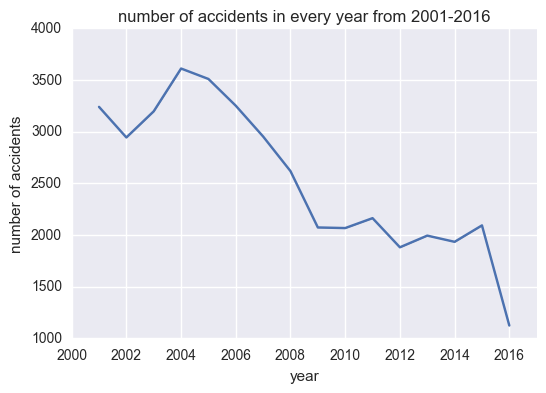

In [69]:
# yearly time series plot of the number of accidents
# syntax: sns.tsplot(y-axis content, x-axis content)
yearly_plot = sns.tsplot(df_yearly['YEAR'].count(), df_yearly.max().index)
yearly_plot.set(ylabel='number of accidents',
                xlabel='year', 
                title = 'yearly time series plot of the number of accidents')
yearly_plot.set(xlim = (2000,2017))

[(2000, 2017)]

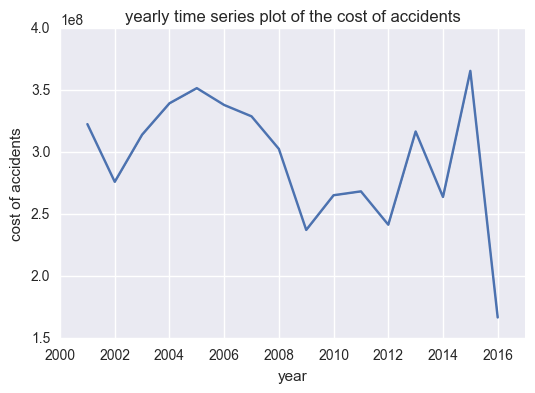

In [71]:
# COST
yearly_plot = sns.tsplot(df_yearly['ACCDMG'].sum(), df_yearly.max().index)
yearly_plot.set(ylabel='cost of accidents',
                xlabel='year', 
                title = 'yearly time series plot of the cost of accidents')
yearly_plot.set(xlim = (2000,2017))

[(2000, 2017)]

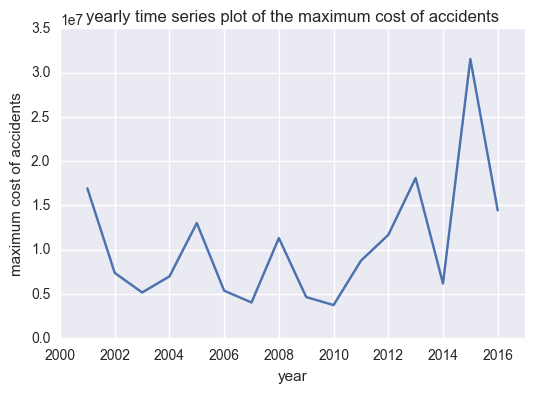

In [72]:
# MAXIMUM COST
yearly_plot = sns.tsplot(df_yearly['ACCDMG'].max(), df_yearly.max().index)
yearly_plot.set(ylabel='maximum cost of accidents',
                xlabel='year', 
                title = 'yearly time series plot of the maximum cost of accidents')
yearly_plot.set(xlim = (2000,2017))

[(2000, 2017)]

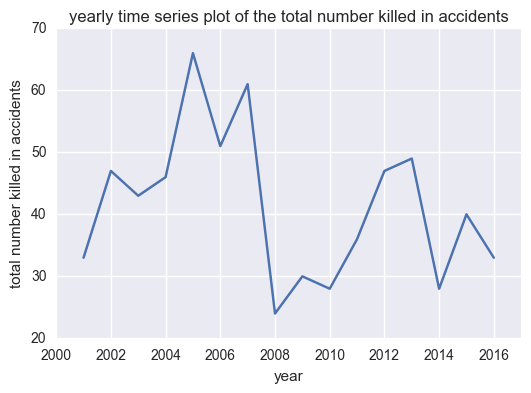

In [73]:
# NUMBER KILLED
yearly_plot = sns.tsplot(df_yearly['TOTKLD'].sum(), df_yearly.max().index)
yearly_plot.set(ylabel='total number killed in accidents',
                xlabel='year', 
                title = 'yearly time series plot of the total number killed in accidents')
yearly_plot.set(xlim = (2000,2017))

[(2000, 2017)]

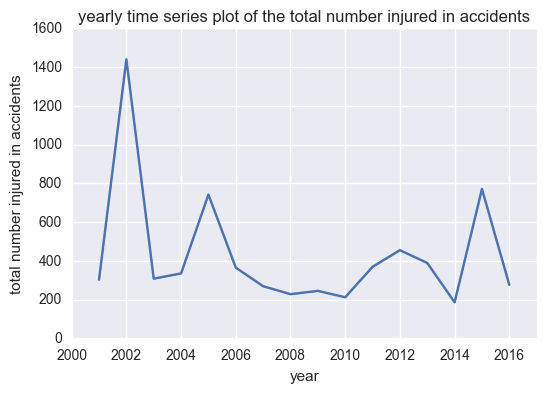

In [74]:
# NUMBER INJURED
yearly_plot = sns.tsplot(df_yearly['TOTINJ'].sum(), df_yearly.max().index)
yearly_plot.set(ylabel='total number injured in accidents',
                xlabel='year', 
                title = 'yearly time series plot of the total number injured in accidents')
yearly_plot.set(xlim = (2000,2017))

## Exercise 6

Look at the time series plots of total accident damage per year and maximum per year. How can we make these visualizations more accurate? Make the adjustment.

[(2000, 2017)]

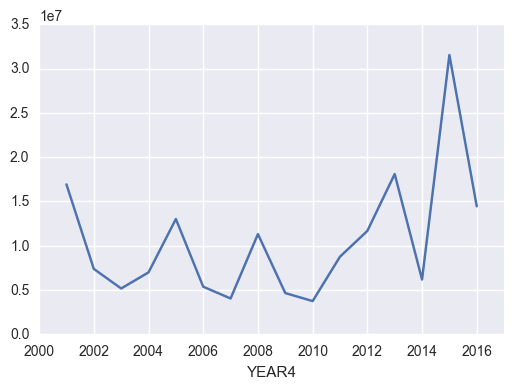

In [39]:
yearly_plot = sns.tsplot(df_yearly['ACCDMG'].max(), df_yearly.sum().index)
axes = yearly_plot.axes
yearly_plot.set(xlim = (2000,2017))
# the plot did not adjust for inflation. 
# HW: adjust plots using inflation factor. 

## Exercise 7

Look at the narratives for the 2 most expensive (corrected) accidents. Do we make any 
adjustments to the data?


In [77]:
df_nodup.ACCDMG.max()

31538754.0

In [92]:
df_nodup.ACCDMG.idxmax(axis = 2)
df_nodup.ix[47231,]

index                                348
ACCAUSE                             H999
ACCDMG                       3.15388e+07
CABOOSE1                               0
CABOOSE2                               0
CARS                                   0
CARSDMG                                0
CARSHZD                                0
CASINJ                               229
CASINJRR                             229
CASKLD                                 8
CASKLDRR                               8
CAUSE       Rack, Roadbed and Structures
COUNTY                      PHILADELPHIA
DAY                                   12
DUMMY3                                 0
EMPTYF1                                0
EMPTYF2                                0
EMPTYP1                                0
EMPTYP2                                0
EQPDMG                         2.714e+07
EVACUATE                               0
HEADEND1                               1
HEADEND2                               1
HIGHSPD         

In [101]:
# also check out the narrative
narrs[47231]

'TRAIN 188 WITH LOCOMOTIVE E/601 AND 7 CARS DERAILED AT MP 81.7 WHILE OPERATING EAST ON # 2 TRACK.  THE FIRST 4 CARS IN THE CONSIST COMPLETELY DERAILED, WITH THE FIRST 3 CARS ON THEIR SIDE AND THE ENGINE CAME TO REST A DISTANCE AWAY IN CONRAIL FRANKFORD YARD. THREE (3) CLASS B EMPLOYEES WERE DEADHEADING TO AND OR HOME FROM WORK AND ONE (1) TRAIN ATTENDANT ALSO RECEIVED AN INJURY. THE NATIONAL TRANSPORTATION SAFETY BOARD DETERMINED THAT THE PROBABLE CAUSE OF THE ACCIDENT WAS THE ENGINEER\x92S ACCELERATION TO 106 MILES PER HOUR AS HE ENTERED A CURVE WITH A 50 MILE PER HOUR SPEED RESTRICTION, DUE TOHIS LOSS OF SITUATIONAL AWARENESS LIKELY BECAUSE HIS ATTENTION WAS DIVERTED TO AN EMERGENCY SITUATION WITH ANOTHER TRAIN. AMTRAKS EQUIPMENT DAMAGE IS  $27,140,000.00.'

In [133]:
# second largest
df_temp = df_nodup.drop([47231])
df_temp.ACCDMG.idxmax(axis = 2)

42881

In [134]:
# checkout the narrative
narrs[42881]

'TRAIN #1548, WHILE TRAVELING EAST ON TRACK #4 TOWARDS BRIDGEPORT STATION, DERAILED AT MP 53.3 AND CAME TO A STOP WITH A PORTION OF THE TRAIN FOULING TRACK #2.  TRAIN #1548 WAS THEN STRUCK BY WEST BOUND TRAIN #1581 AFTER TRAIN #1548 CAME TO A STOP DUE TO THE DERAILMENT.'

key takeaways are these observations maybe outliers. Should consider removing them in the data preprocessing stage.

## Exercise 8

Use plt.figure with add.subplot to plot histograms of TRNSPD with the default bin size and then for bins 10, 50, and 100 all in one figure. Repeat this for TEMP. What problem do you observe? How should we correct this?

(array([  5.10900000e+03,   1.81500000e+03,   6.89800000e+03,
          5.13600000e+03,   4.63200000e+03,   2.43200000e+03,
          4.40800000e+03,   2.24000000e+02,   5.26000000e+02,
          1.97000000e+02,   5.49000000e+02,   2.06000000e+02,
          4.01000000e+02,   4.37000000e+02,   3.27000000e+02,
          2.62000000e+02,   8.29000000e+02,   1.18000000e+02,
          2.84000000e+02,   1.28000000e+02,   5.22000000e+02,
          1.11000000e+02,   1.84000000e+02,   2.63000000e+02,
          2.38000000e+02,   2.16000000e+02,   6.52000000e+02,
          9.20000000e+01,   2.67000000e+02,   1.20000000e+02,
          4.72000000e+02,   1.80000000e+02,   3.84000000e+02,
          4.28000000e+02,   1.17000000e+02,   6.50000000e+01,
          2.02000000e+02,   3.40000000e+01,   9.10000000e+01,
          6.70000000e+01,   2.73000000e+02,   2.40000000e+01,
          3.00000000e+01,   6.40000000e+01,   3.50000000e+01,
          3.00000000e+01,   1.43000000e+02,   4.00000000e+00,
        

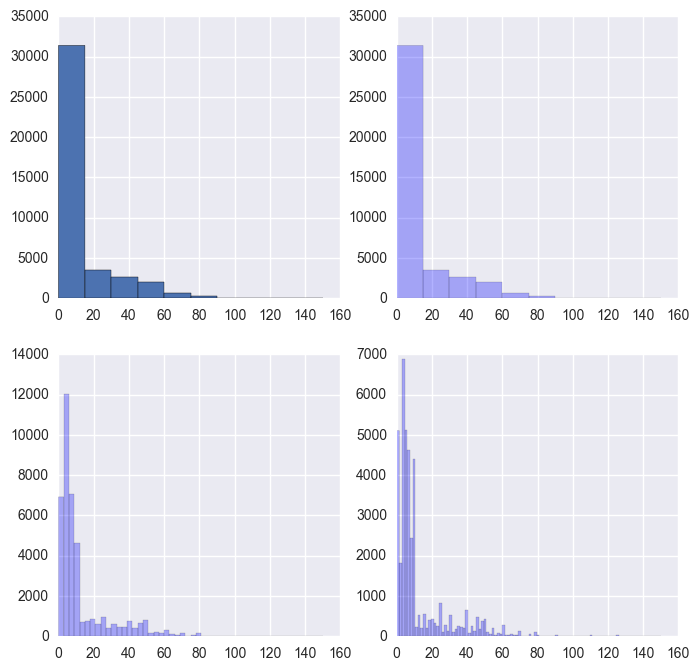

In [54]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(df_nodup.TRNSPD)
ax2.hist(df_nodup.TRNSPD, bins = 10, color = 'b', alpha = 0.3)
ax3.hist(df_nodup.TRNSPD, bins = 50, color = 'b', alpha = 0.3)
ax4.hist(df_nodup.TRNSPD, bins = 100, color = 'b', alpha = 0.3)
# bins is ths # of bins. so the larger bins is, the slimer each strip will be
# rounding led to subtle patterns in the plot. which is reporting bias
# lead to inaccuracies in representations of data.

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   9.00000000e+00,   2.00000000e+00,
          6.00000000e+00,   1.00000000e+01,   3.00000000e+00,
          9.00000000e+00,   4.00000000e+00,   2.70000000e+01,
          1.20000000e+01,   1.60000000e+01,   3.60000000e+01,
          1.00000000e+01,   2.90000000e+01,   1.39000000e+02,
          3.10000000e+01,   5.80000000e+01,   1.08000000e+02,
          6.10000000e+01,   8.30000000e+01,   1.94000000e+02,
          1.15000000e+02,   4.00000000e+01,   2.33000000e+02,
          1.44000000e+02,   1.51000000e+02,   6.25000000e+02,
          9.60000000e+01,   2.71000000e+02,   6.64000000e+02,
          1.40000000e+02,   6.09000000e+02,   2.01000000e+02,
          1.11700000e+03,   7.57000000e+02,   3.78000000e+02,
        

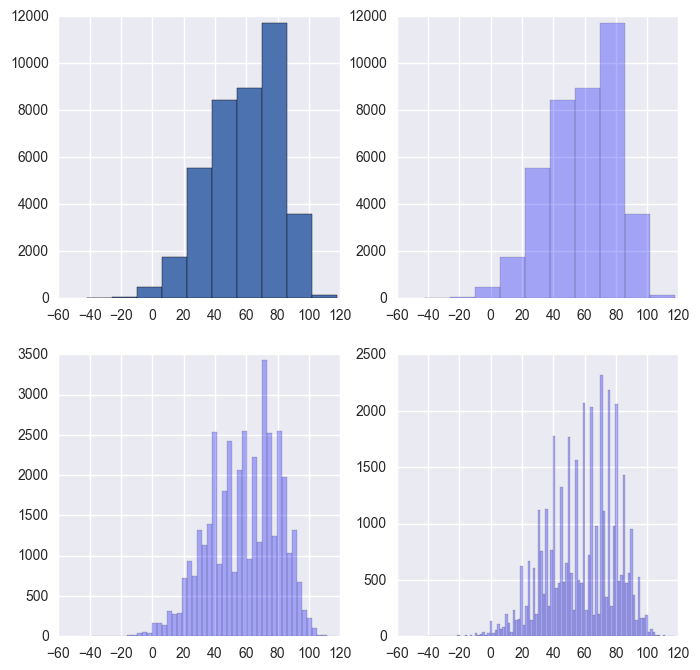

In [136]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(df_nodup.TEMP)
ax2.hist(df_nodup.TEMP, bins = 10, color = 'b', alpha = 0.3)
ax3.hist(df_nodup.TEMP, bins = 50, color = 'b', alpha = 0.3)
ax4.hist(df_nodup.TEMP, bins = 100, color = 'b', alpha = 0.3)

## how to correct?
it is hard to find the optimal bin number. Maybe can use a certain algorithm to try to find the most optimal number of bins. Some number that can display adequate amount of information, while at the same time not being overly-sensitive to the granular and subtle differences in the data. 

## Exercise 9

Use pd.scatter_matrix to get a scatter plot matix of TRNSPD, TONS, CARS, TOTINJ, TOTKLD, and ACCDMG2016. What conclusions can you draw from this?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cdf0f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ed6bc18>]], dtype=object)

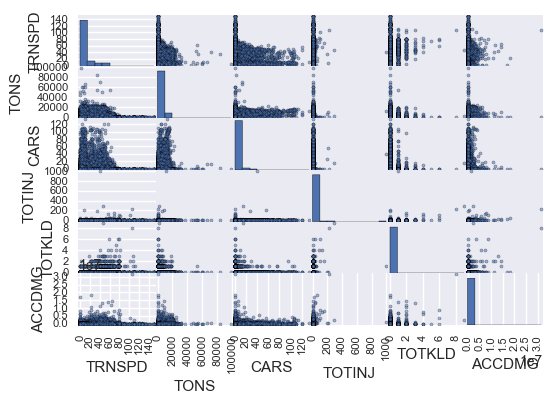

In [57]:
pd.scatter_matrix(df_nodup[['TRNSPD','TONS','CARS','TOTINJ','TOTKLD','ACCDMG']],
                 diagonal = 'hist')

## Conclusions drawn:
ACCDMG: there is no strong correlation with any of the variables
TOTKLD: is a categorical variable
CARS: exhibits a linear relationship with TOTKLD
TRNSPD: exhibits a potential linear relationship with TOTKLD

Thus, should consider TOTKLD as a response variable. 